# Textbook QFT

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `QFTTextBook`
Standard Quantum Fourier Transform from Nielsen and Chuang

Performs the QFT on a register of `bitsize` qubits utilizing
$n$ Hadamards and $n * (n - 1) / 2$ controlled Z
rotations, along with a reversal of qubit ordering specified via
`with_reverse` which defaults to `True`. `bitsize` can be provided numerically or symbolically.
More specific QFT implementations can be found:
- `ApproximateQFT` A less accurate QFT which ignores small phase rotations.
- `QFTPhaseGradient` requires an additional input phase gradient register
to be provided but utilizes controlled addition instead of rotations, which leads to reduced
T-gate complexity.
- `TwoBitFFFT` if you need to implement a two-qubit fermionic Fourier transform.

#### Registers
 - `q`: A `QUInt` of `bitsize` qubits on which the QFT is performed. 

#### References
 - [Quantum Computation and Quantum Information: 10th Anniversary Edition,     Nielsen & Chuang](https://www.cambridge.org/highereducation/books/quantum-computation-and-quantum-information/01E10196D0A682A6AEFFEA52D53BE9AE#overview).     Chapter 5.1

#### Parameters
 - `bitsize`: Size of the input register to apply QFT on.
 - `with_reverse`: Whether or not to include the swaps at the end of the circuit decomposition that reverse the order of the qubits. If True, the swaps are inserted. Defaults to True. These are technically necessary in order to perform the correct effect, but can almost always be optimized away by just performing later operations on different qubits. 

Costs:
    Qubits: $n$ qubits, no additional ancilla required.
    Gates: $n * (n - 1) / 2$ controlled-rotation gates and $n$ Hadamard gates.

In [2]:
from qualtran.bloqs.qft import QFTTextBook

### Example Instances

In [3]:
qft_text_book = QFTTextBook(3)

In [4]:
n = sympy.symbols('n')
symbolic_qft = QFTTextBook(bitsize=n)

#### Graphical Signature

In [5]:
from qualtran.drawing import show_bloqs
show_bloqs([qft_text_book, symbolic_qft],
           ['`qft_text_book`', '`symbolic_qft`'])

### Call Graph

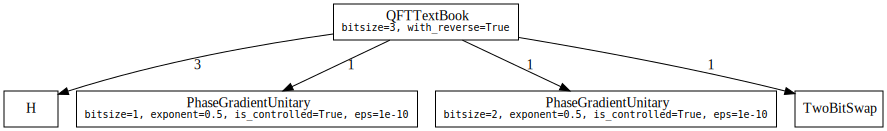

#### Counts totals:
 - `H`: 3
 - `PhaseGradientUnitary`: 1
 - `PhaseGradientUnitary`: 1
 - `TwoBitSwap`: 1

In [6]:
from qualtran.resource_counting.generalizers import ignore_split_join
qft_text_book_g, qft_text_book_sigma = qft_text_book.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(qft_text_book_g)
show_counts_sigma(qft_text_book_sigma)